In [1]:
from synthesis import build_model
from synthesis import wavegen
import torch
import numpy as np
import math
from utils.dsp import load_wav
from utils.dsp import melspectrogram
import time
import IPython.display
import librosa
import librosa.display
from sklearn.metrics import mean_squared_error

In [2]:
def print_datas(data):
    print('shape:', data.shape)
    print('min:', data.min() )
    print('max:', data.max() )
    print('mean:', data.mean() )

In [3]:
dim_neck = 32
dim_emb = 256
dim_pre = 512
freq = 32

In [4]:
device = torch.device('cpu')
wavnet = build_model().to(device)
checkpoint = torch.load('./checkpoint_step001000000_ema.pth', map_location=device)
wavnet.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [5]:
s = 5000
wav = load_wav('./VCTK-Corpus/wav48/p225/p225_001.wav')[s:16000+s]
print_datas(wav)

shape: (16000,)
min: -0.70037174
max: 0.78906715
mean: -0.00012405896


In [6]:
IPython.display.Audio(wav, rate=16000)

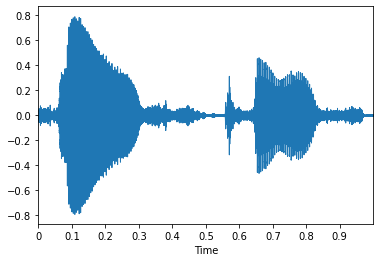

In [7]:
librosa.display.waveplot(wav, 16000)

In [8]:
mel = melspectrogram(wav)
pad_len = math.ceil(mel.shape[1] / 32) * 32 - mel.shape[1]
mel = np.pad(mel, ((0,0), (0, pad_len)), mode='constant')
print_datas(mel)

shape: (80, 64)
min: 0.0
max: 1.0
mean: 0.5954064


/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/suzukidaishi/.pyenv/versions/3.7.9/lib/python3.7/site-packages/librosa/display.py:862: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


<AxesSubplot:xlabel='Time', ylabel='Hz'>

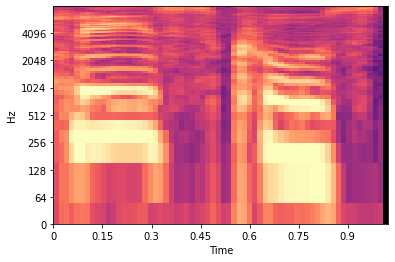

In [9]:
librosa.display.specshow(mel, sr=16000, hop_length=256, x_axis='time', y_axis='log')

In [10]:
mel_rec = mel
mel_rec = mel_rec[:,:-pad_len]
c = np.transpose(mel_rec, (1, 0))
print_datas(c)

shape: (63, 80)
min: 0.2911908
max: 1.0
mean: 0.60485727


In [11]:
waveform = wavegen(wavnet, device, c=c)
print_datas(waveform)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16128/16128 [03:33<00:00, 75.66it/s]

shape: (16128,)
min: -1.0
max: 1.0
mean: -0.00060361886


In [12]:
IPython.display.Audio(waveform, rate=16000)

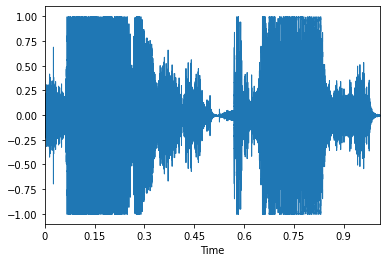

In [13]:
librosa.display.waveplot(waveform, 16000)

In [14]:
mean_squared_error(wav, waveform)

ValueError: Found input variables with inconsistent numbers of samples: [16000, 16128]